In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

import functions

In [3]:
pip = functions.PiPlus()

In [16]:
df = pd.read_csv('COMPASS_d_2009.csv')

In [17]:
pipdata = df.loc[df['hadron'] == 'pi+', :]

In [18]:
pipkins = np.array(pipdata[['x', 'z', 'phT', 'Q2']])

In [19]:
pip.sivers(pipkins, 2, 2, 2, 2, 2, 2, 2)

array([0.00139287, 0.00181429, 0.00233682, 0.00279853, 0.00362094,
       0.00487984, 0.00621739, 0.00652098, 0.00305777, 0.00325126,
       0.00300023, 0.00272009, 0.00266475, 0.00287355, 0.00397921,
       0.00735364, 0.0162003 , 0.00077871, 0.00128017, 0.00180345,
       0.00235905, 0.00304852, 0.00398625, 0.00548485, 0.0083014 ,
       0.01873337])

In [20]:
pars, cov = optimize.curve_fit(pip.sivers, pipkins, pipdata['Siv'],
                               sigma=pipdata['tot_err'], method='lm')

Parameters in order of: Nu, au, bu, Ndbar, adbar, bdbar, m1

In [21]:
pars

array([ 3.58423516e-01,  1.19369737e+00,  2.10079251e-07, -2.55374861e-01,
        1.00000000e+00,  1.00000000e+00,  1.01487045e+00])

In [24]:
xdepend = pipdata.loc[pipdata['1D_dependence'] == 'x', :]

In [25]:
xdependkins = np.array(xdepend[['x', 'z', 'phT', 'Q2']])

In [27]:
yhat = pip.sivers(xdependkins, *pars)

In [35]:
np.sum(((xdepend['Siv'] - yhat)/xdepend['tot_err']) ** 2)

7.452197824594449

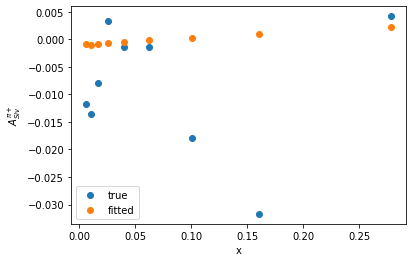

In [32]:
plt.scatter(xdepend['x'], xdepend['Siv'], label='true')
plt.scatter(xdepend['x'], yhat, label='fitted')
plt.xlabel('x')
plt.ylabel('$A^{\pi+}_{Siv}$')
plt.legend()
plt.show()